# 12.5.4 NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. In particular, PCA and hierarchical clustering are popular tools. We illustrate these techniques on the `NC160` cancer cell line microarray data, which consists of $6,830$ gene expression measurements on 64 cancer cell lines.

In [1]:
library(ISLR2)
nci.labs <- NCI60$labs
nci.data <- NCI60$data

Each cell line is labeled with a cancer type, given in `nci.labs`. We do not make use of the cancer types in performing PCA and clustering, as these are unsupervised techniques. But after performing PCA and clustering, we will check to see the extent to which these cancer types agree with the results of these unsupervised techniques.

The data has 64 rows and $6,830$ columns.

In [2]:
dim(nci.data)

[1]   64 6830

We begin by examining the cancer types for the cell lines.

In [3]:
nci.labs[1:4]

[1] "CNS"   "CNS"   "CNS"   "RENAL"

In [4]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

## PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes) to have standard deviation one, although one could reasonably argue that it is better not to scale the genes.

In [5]:
pr.out <- prcomp(nci.data, scale = TRUE)

We now plot the first few principal component score vectors, in order to visualize the data. The observations (cell lines) corresponding to a given cancer type will be plotted in the same color, so that we can see to what extent the observations within a cancer type are similar to each other. We first create a simple function that assigns a disticnt color to each element of a numeric vector. The function will be used to assign a color to each of the 64 cell lines, based on the cancer type to which it corresponds.

In [6]:
Cols <- function(vec) {
    cols <- rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

Note that the `rainbow()` function takes as its argument a positive integer and returns a vector containing that number of distinct colors. We now can plot the principal component score vectors.

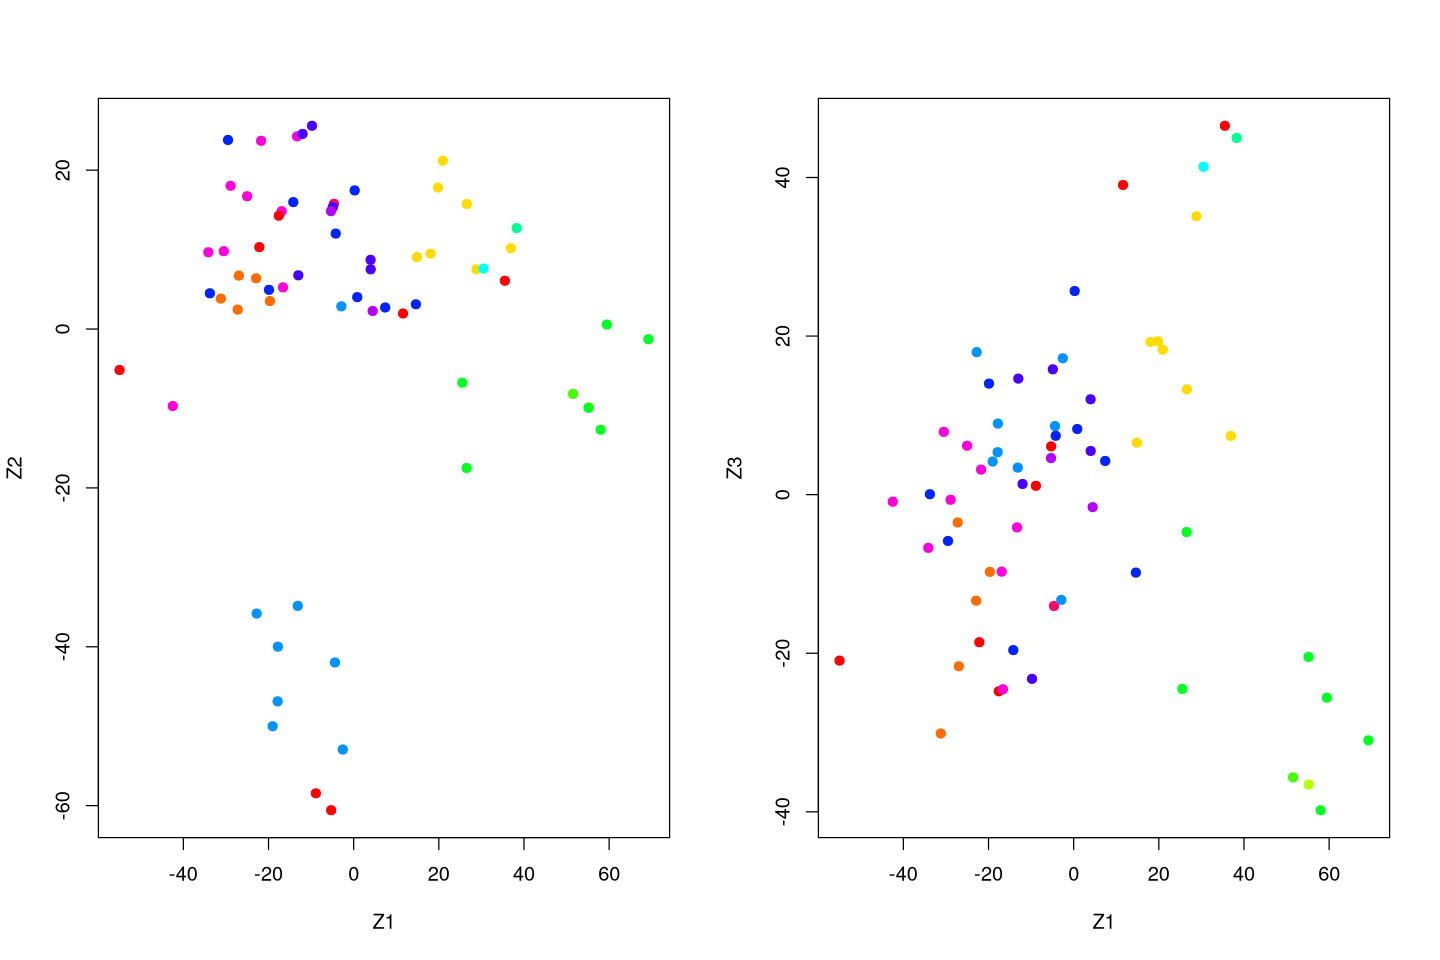

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(1, 2))
plot(pr.out$x[, 1:2], col = Cols(nci.labs), pch = 19,
     xlab = "Z1", ylab = "Z2")
plot(pr.out$x[, c(1, 3)], col = Cols(nci.labs), pch = 19,
     xlab = "Z1", ylab = "Z3")

The resulting plots are shown in the Figure. On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the first few principal component score vectors. This indicates that cell lines from the same cancer type tend to have pretty similar gene expression levels.

We can obtain a summary of the proportion of variance explained (PVE) of the first few principal components using the `summary()` method for a `prcomp` object (we have truncated the printout):

In [8]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

Using the `plot()` function, we can also plot the variance explained by the first few principal components.

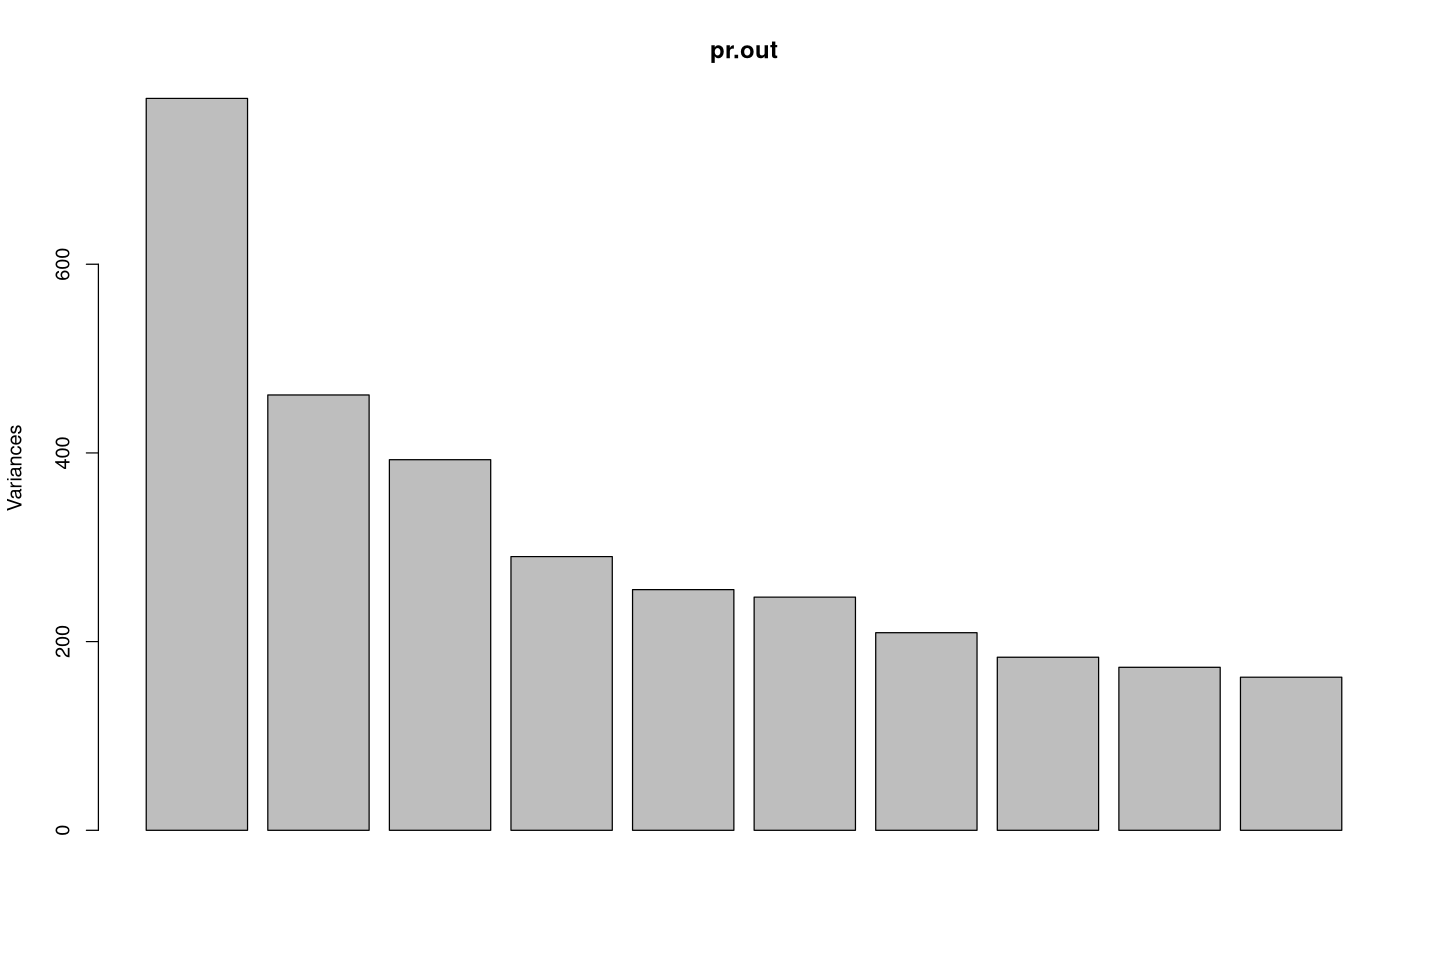

In [9]:
plot(pr.out)

Note that the height of each bar in the bar plot is given by squaring the corresponding element of `pr.out$sdev`. However, it is more informative to plot the PVE of each principal component. (i.e. a scree plot) and the cumulative PVE of each principal component. This can be done with just a little work.

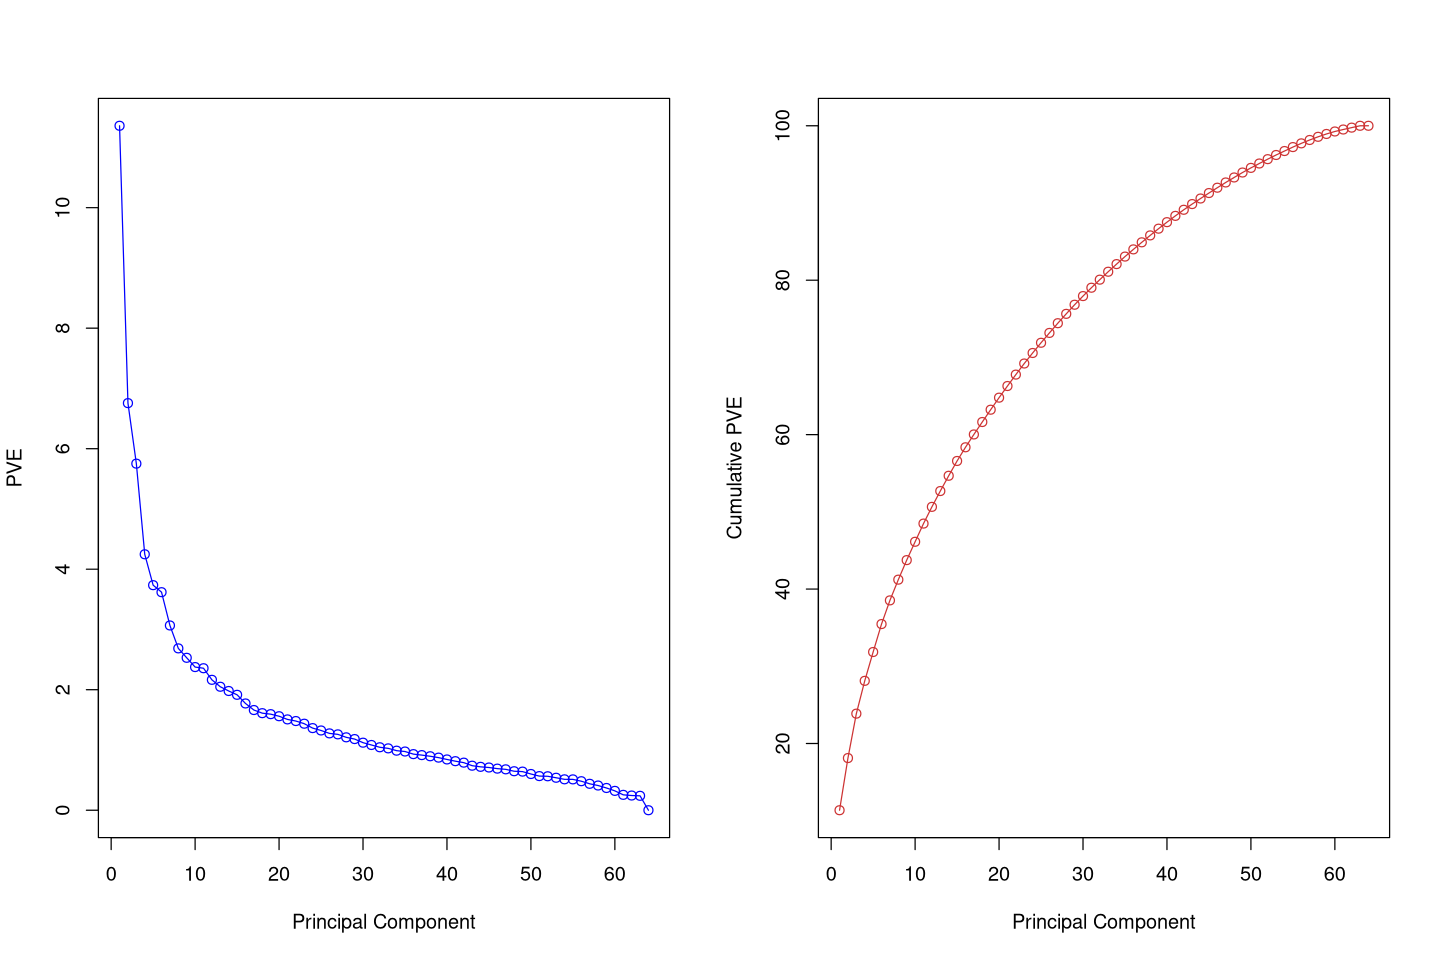

In [10]:
pve <- 100 * pr.out$sdev^2 / sum(pr.out$sdev^2)
par(mfrow = c(1, 2))
plot(pve, type = "o", ylab = "PVE",
     xlab = "Principal Component", col = "blue")
plot(cumsum(pve), type = "o", ylab = "Cumulative PVE",
     xlab = "Principal Component", col = "brown3")

(Note that the elements of `pve` can also be computed directly from the summary, `summary(pr.out)$importance[2,]`, and the elements of `cumsum(pve)` are given by `summary(pr.out)$importance[3,]`). The resulting plots are shown in Figure 12.18. We see that together, the first seven principal components explain around $40\%$ of the variance in the data. This is not a huge amount of the variance. However, looking at the scree plot, we see that amount of variance, there is a marked decrease in the variance explained by furthher principal components. That is, there is an _elbow_ in the plot after approximately the seventh principal component. This suggests that there may be little benefit to examining more than seven or so principal components (though even examining seven principal components may be difficult).

## Clustering the Observations of the NCI60 Data

We now proceed to hierarchically cluster the cell lines in the `NCI60` data, with the goal of finding out whether or not the observations cluster into distinct types of cancer. To begin, we standardize the varables to have mean zero and standard deviation one. As mentioned earlier, this step is optional and should be performed only if we want each gene to be on the same _scale_.

In [12]:
sd.data <- scale(nci.data)

We now perform hierarchical clustering of the observations using complete, single, and average linakge. Euclidean distance is used as the dissimilarity measure.

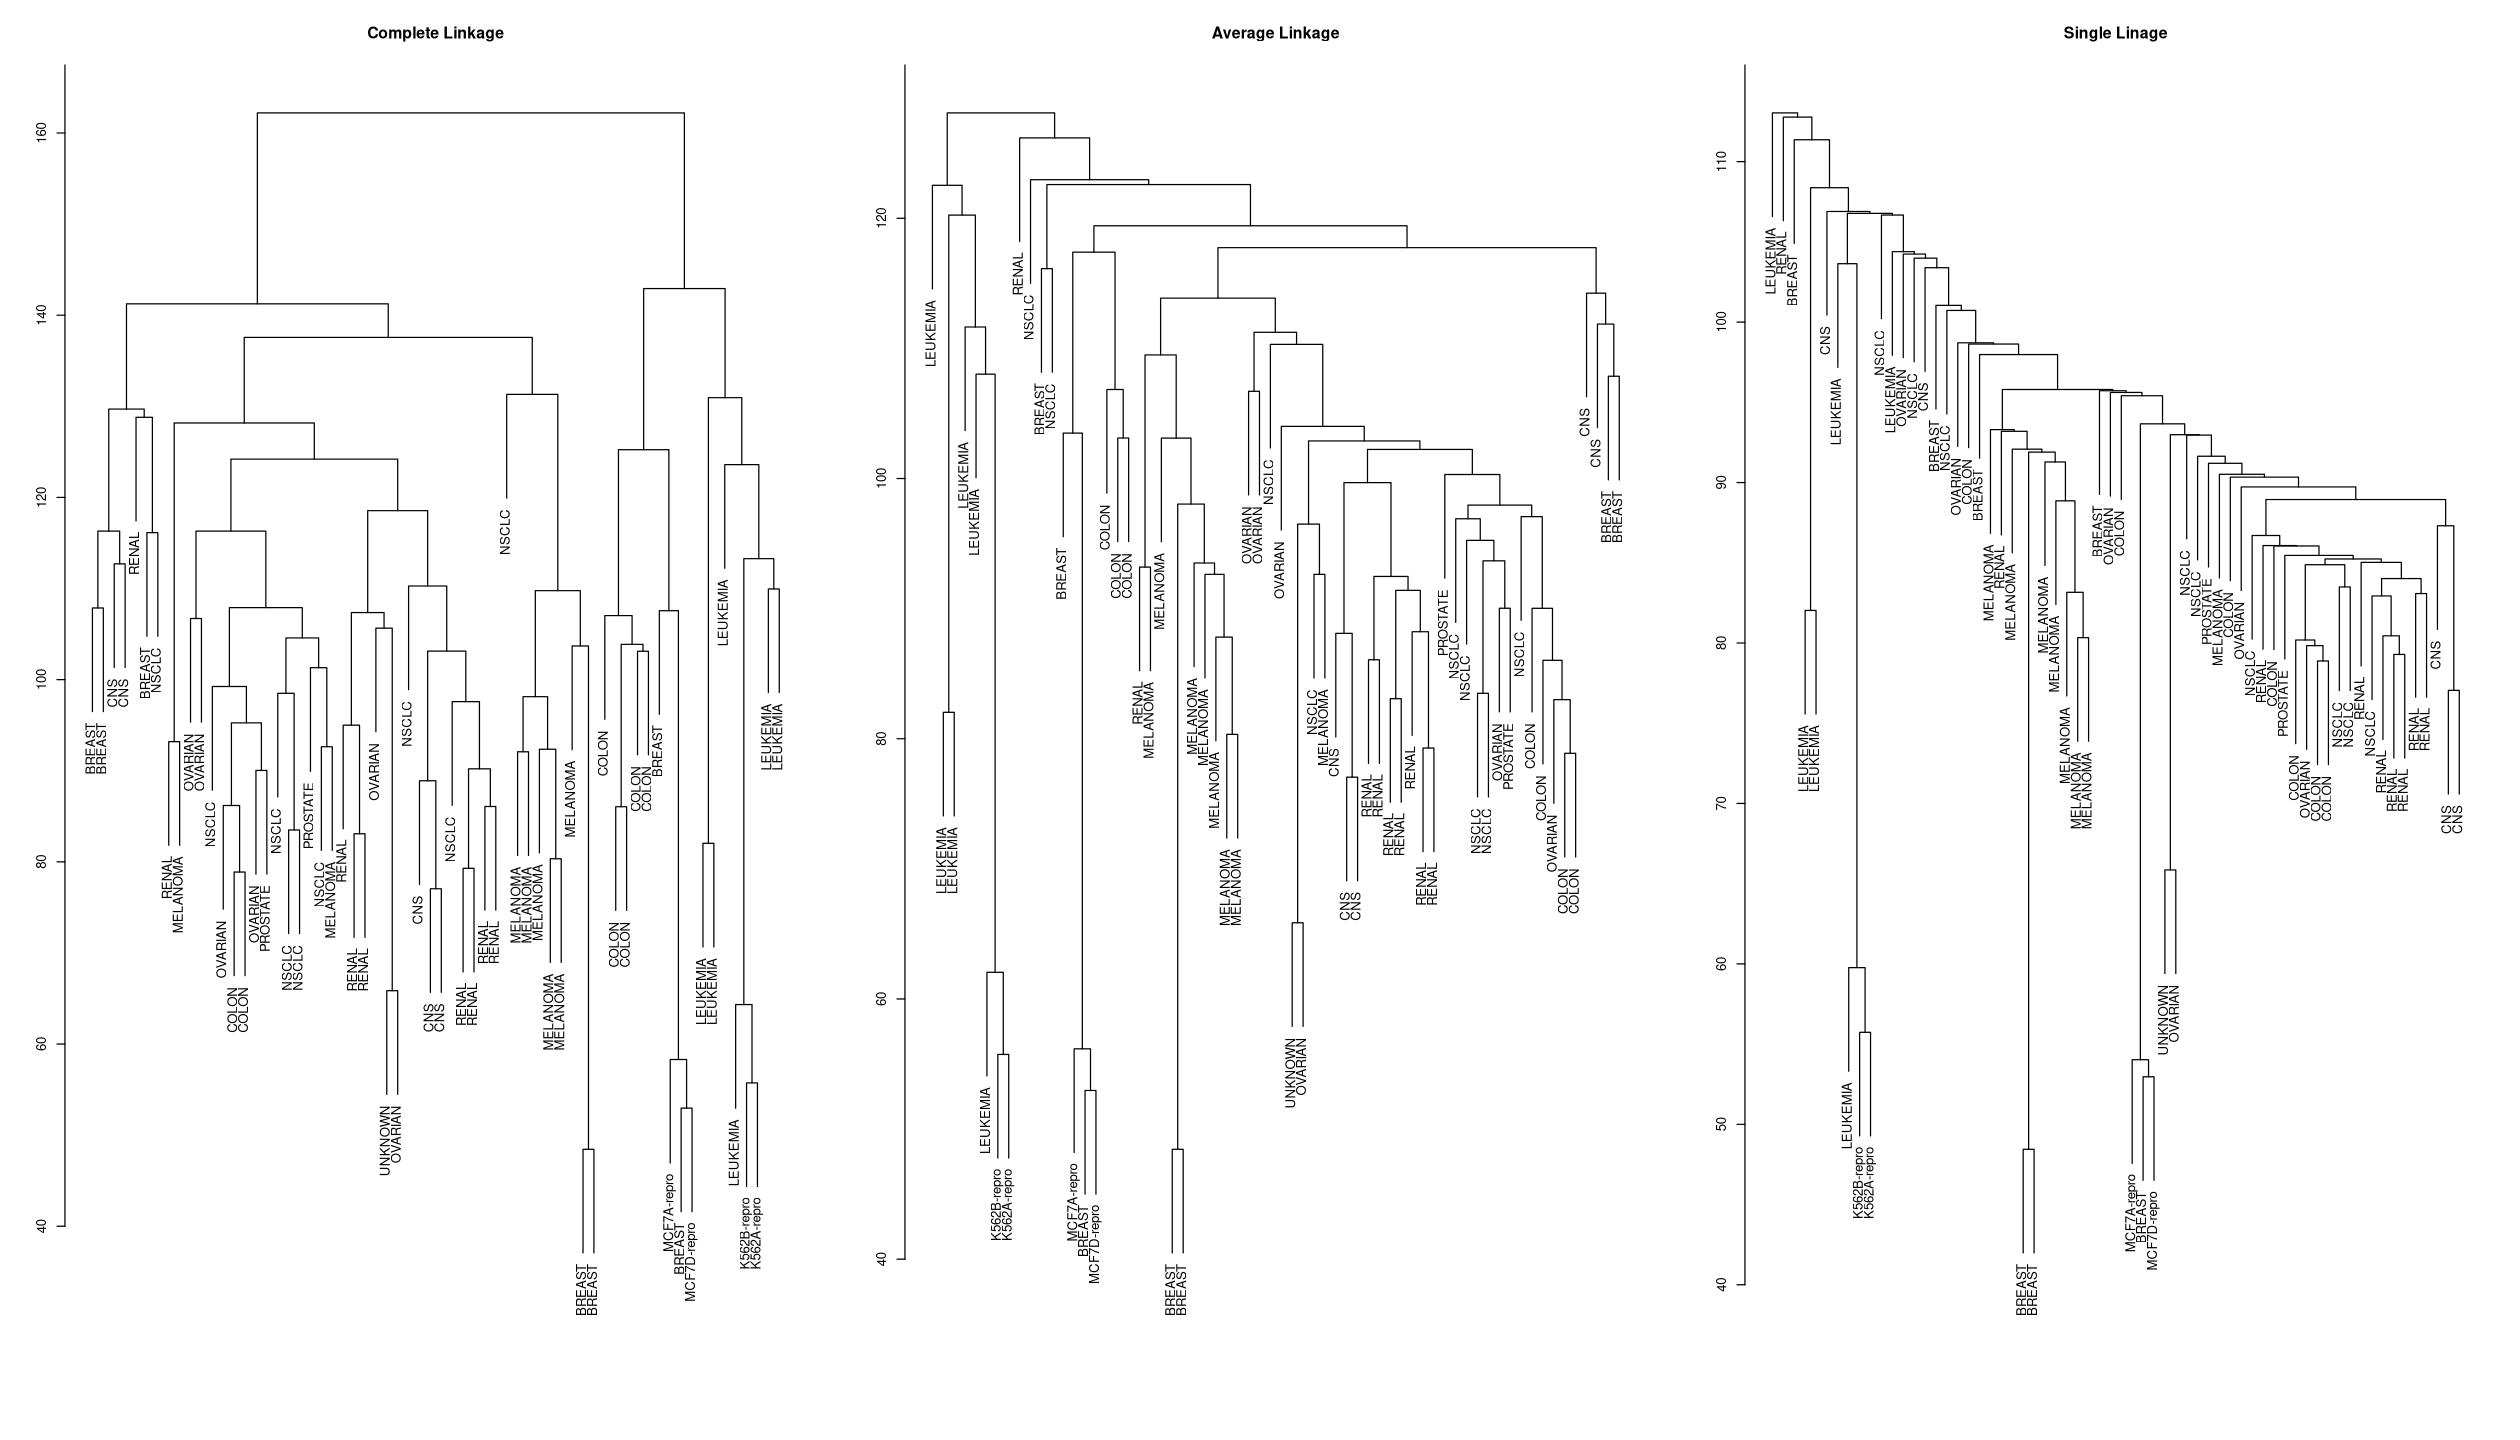

In [17]:
options(repr.plot.width = 21, repr.plot.height =12)
par(mfrow = c(1, 3))
data.dist <- dist(sd.data)
plot(hclust(data.dist), xlab = "", sub = "", ylab = "",
     labels = nci.labs, main = "Complete Linkage")
plot(hclust(data.dist, method = "average"),
     labels = nci.labs, main = "Average Linkage",
     xlab = "", sub = "", ylab = "")
plot(hclust(data.dist, method = "single"),
     labels = nci.labs, main = "Single Linage",
     xlab = "", sub = "", ylab = "")

The results are shown in Figure 12.19. We see that the choice of linkage certainly does affect the result obtained. Typically, single linage will tend to yield _trailing_ clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage tend to yield more balanced, attractive clusters. For this reason, complete and average linkage are generally preferred to single linkage. Clearly cell clustering is not perfect. We will use complete linkage hierarchical clustering for the analysis that follows.

We can cut the dendrogram at the height that will yield a particular number of clusters, say four:

In [20]:
hc.out <- hclust(dist(sd.data))
hc.clusters <- cutree(hc.out, 4)
table(hc.clusters, nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

There are some clear patterns. All the leukemia cell lines fall in cluster 3, while the breast cancer cell lines are spread out over three different clusters. We can plot the cut on the dendrogram that produces these four clusters:

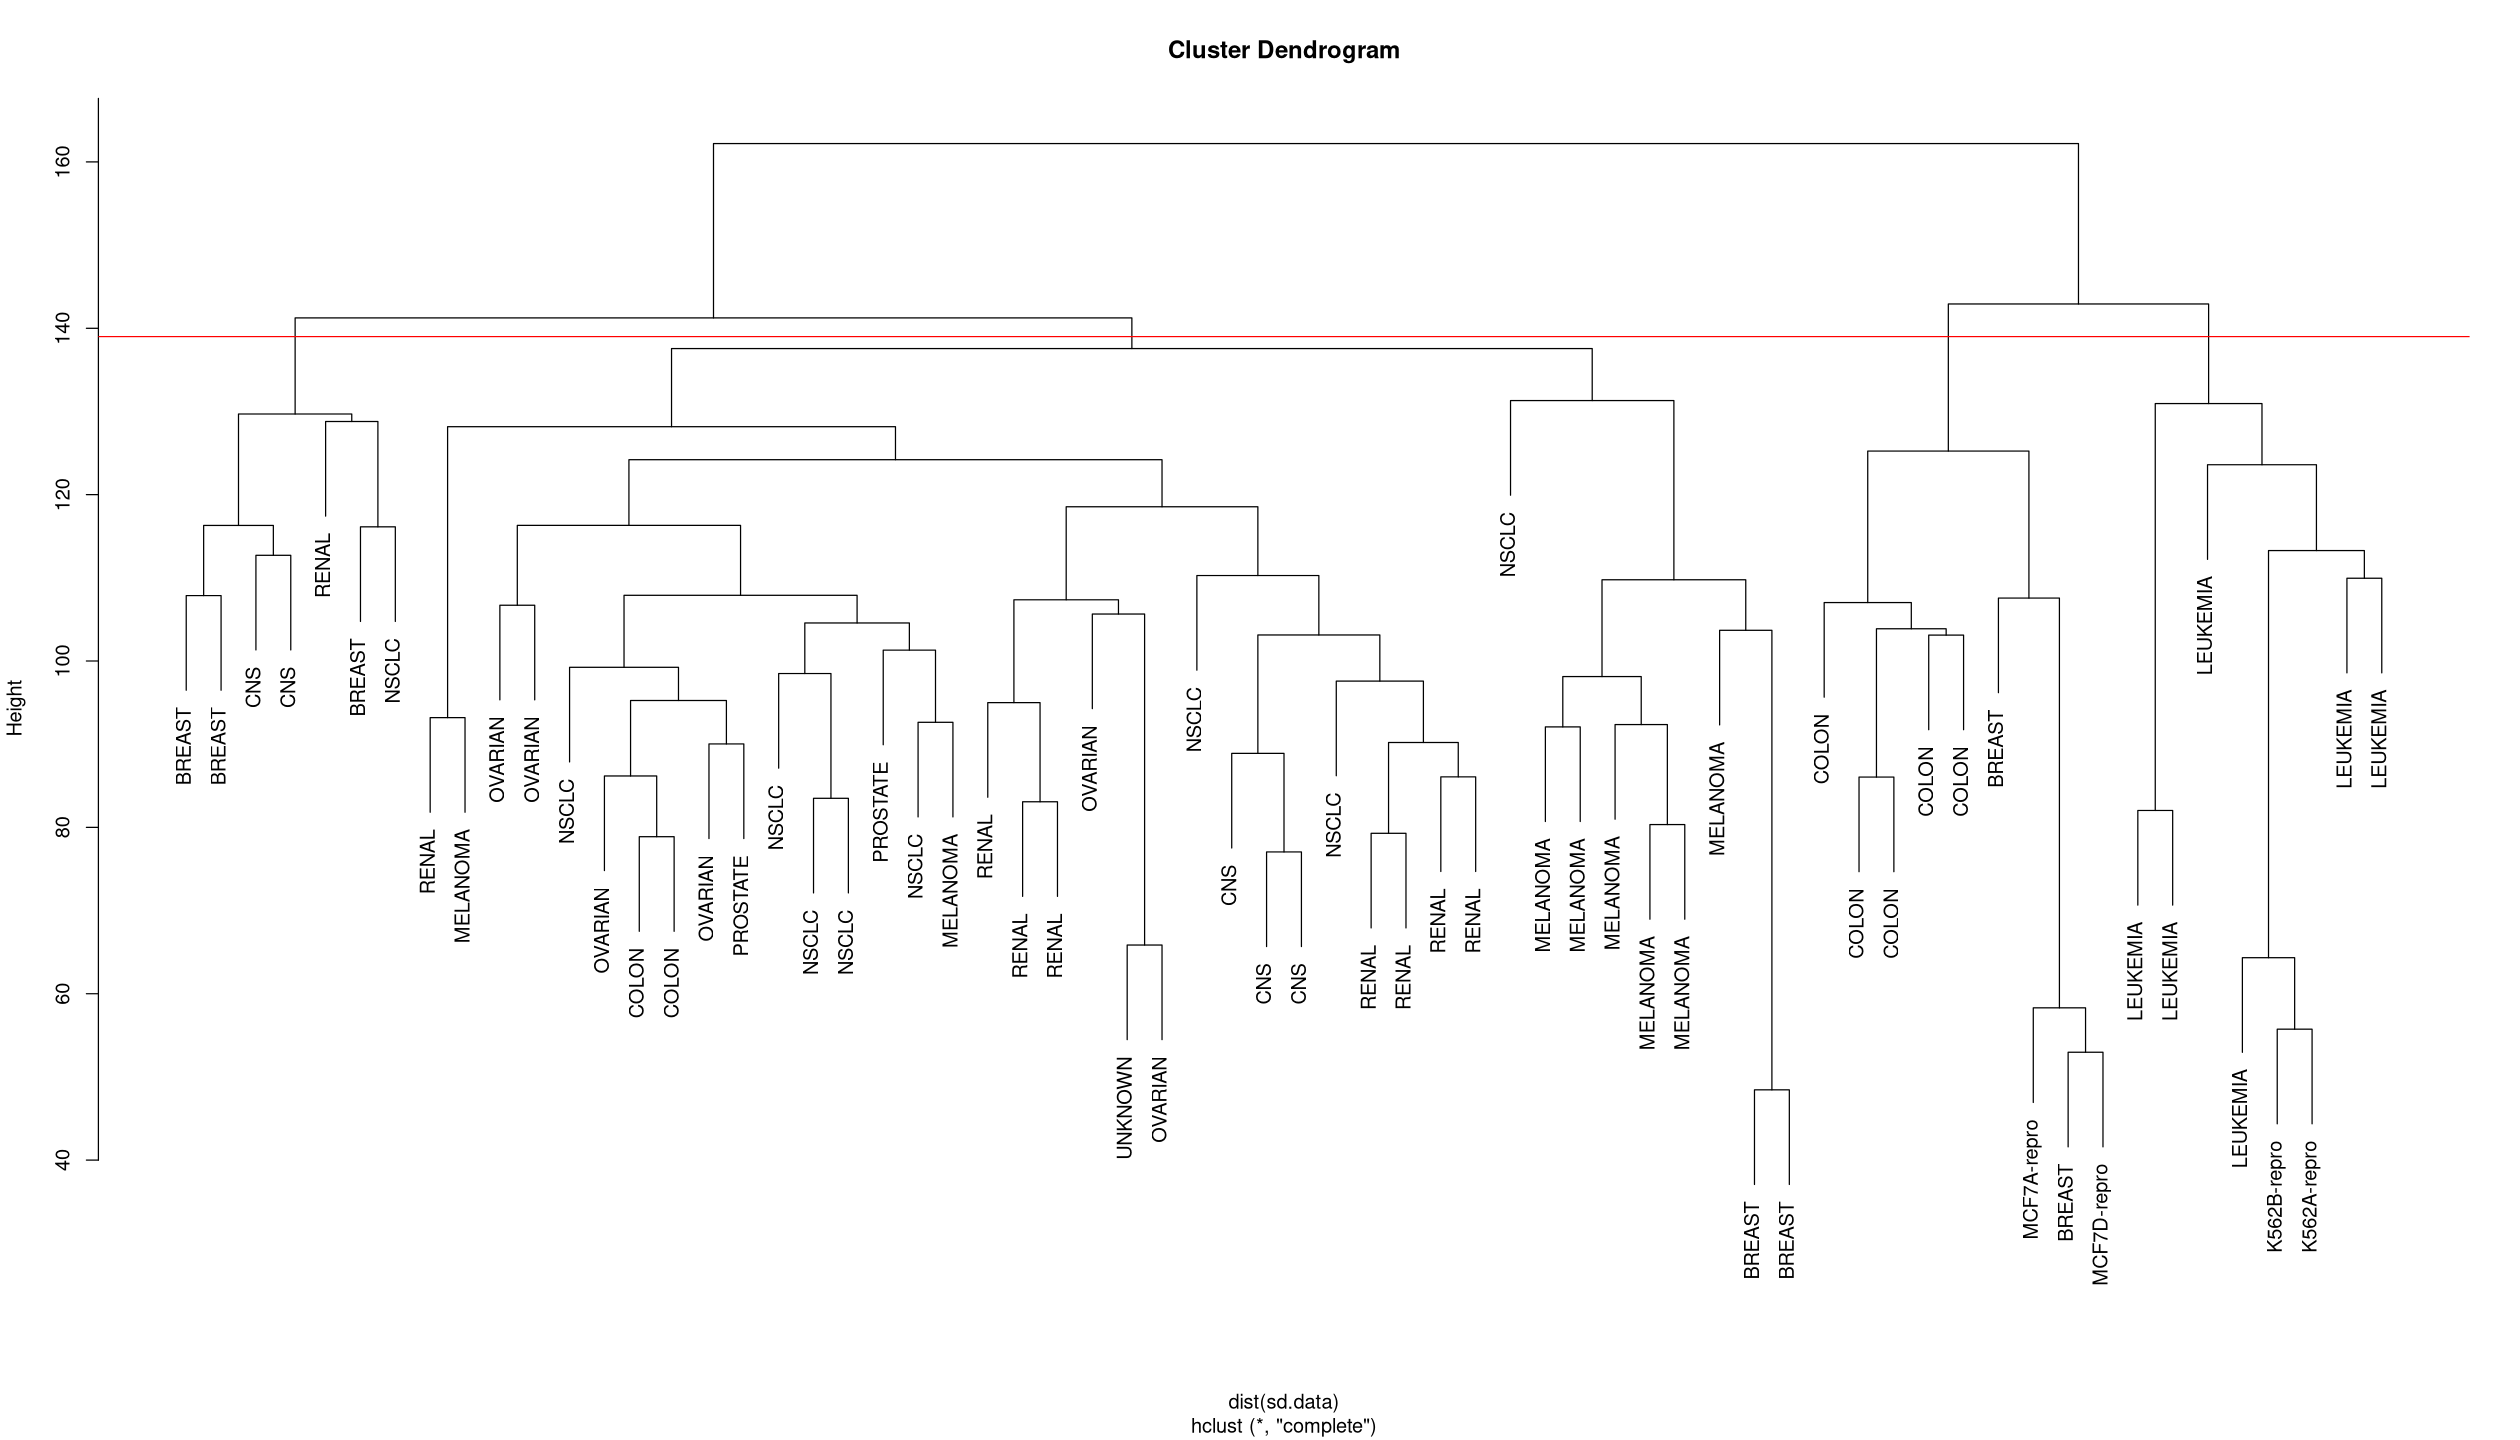

In [21]:
par(mfrow = c(1, 1))
plot(hc.out, labels = nci.labs)
abline(h = 139, col = "red")

The `abline()` function draws a straight line on top of any existing plot in `R`. The argument `h = 139` plots a horizontal line at height 139 on the dendrogram; this is the height that results in four distinct clusters. It is easy to verify that the resulting clusters are the same as the ones we obtained using `cutree(hc.out,4)`.

Printing the output `hclust` gives a useful brief summary of the object:

In [22]:
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


We claimed earlier in Section 12.4.2 that K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield very different results. How do these `NCI60` hierarchical clustering results compare to what we get if we perform K-means clustering with K=4?

In [23]:
set.seed(2)
km.out <- kmeans(sd.data, 4, nstart = 20)
km.clusters <- km.out$cluster
table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0

We see that the four clusters obtained using hierarchical clustering and K-means clustering are somewhat different. Cluster 4 in K-means clustering is identical to cluster 3 in hierarchical clustering. However, the other clusters differ: for instance, cluster 2 in K-means clustering contains a portion of the observations assigned to cluster 1 by hierarchical clustering, as well as all of the observations assigned to cluster 2 by hierarchical clustering.

Rather than performing hierarchical clustering on the first few principal component score vectors, as follows:

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

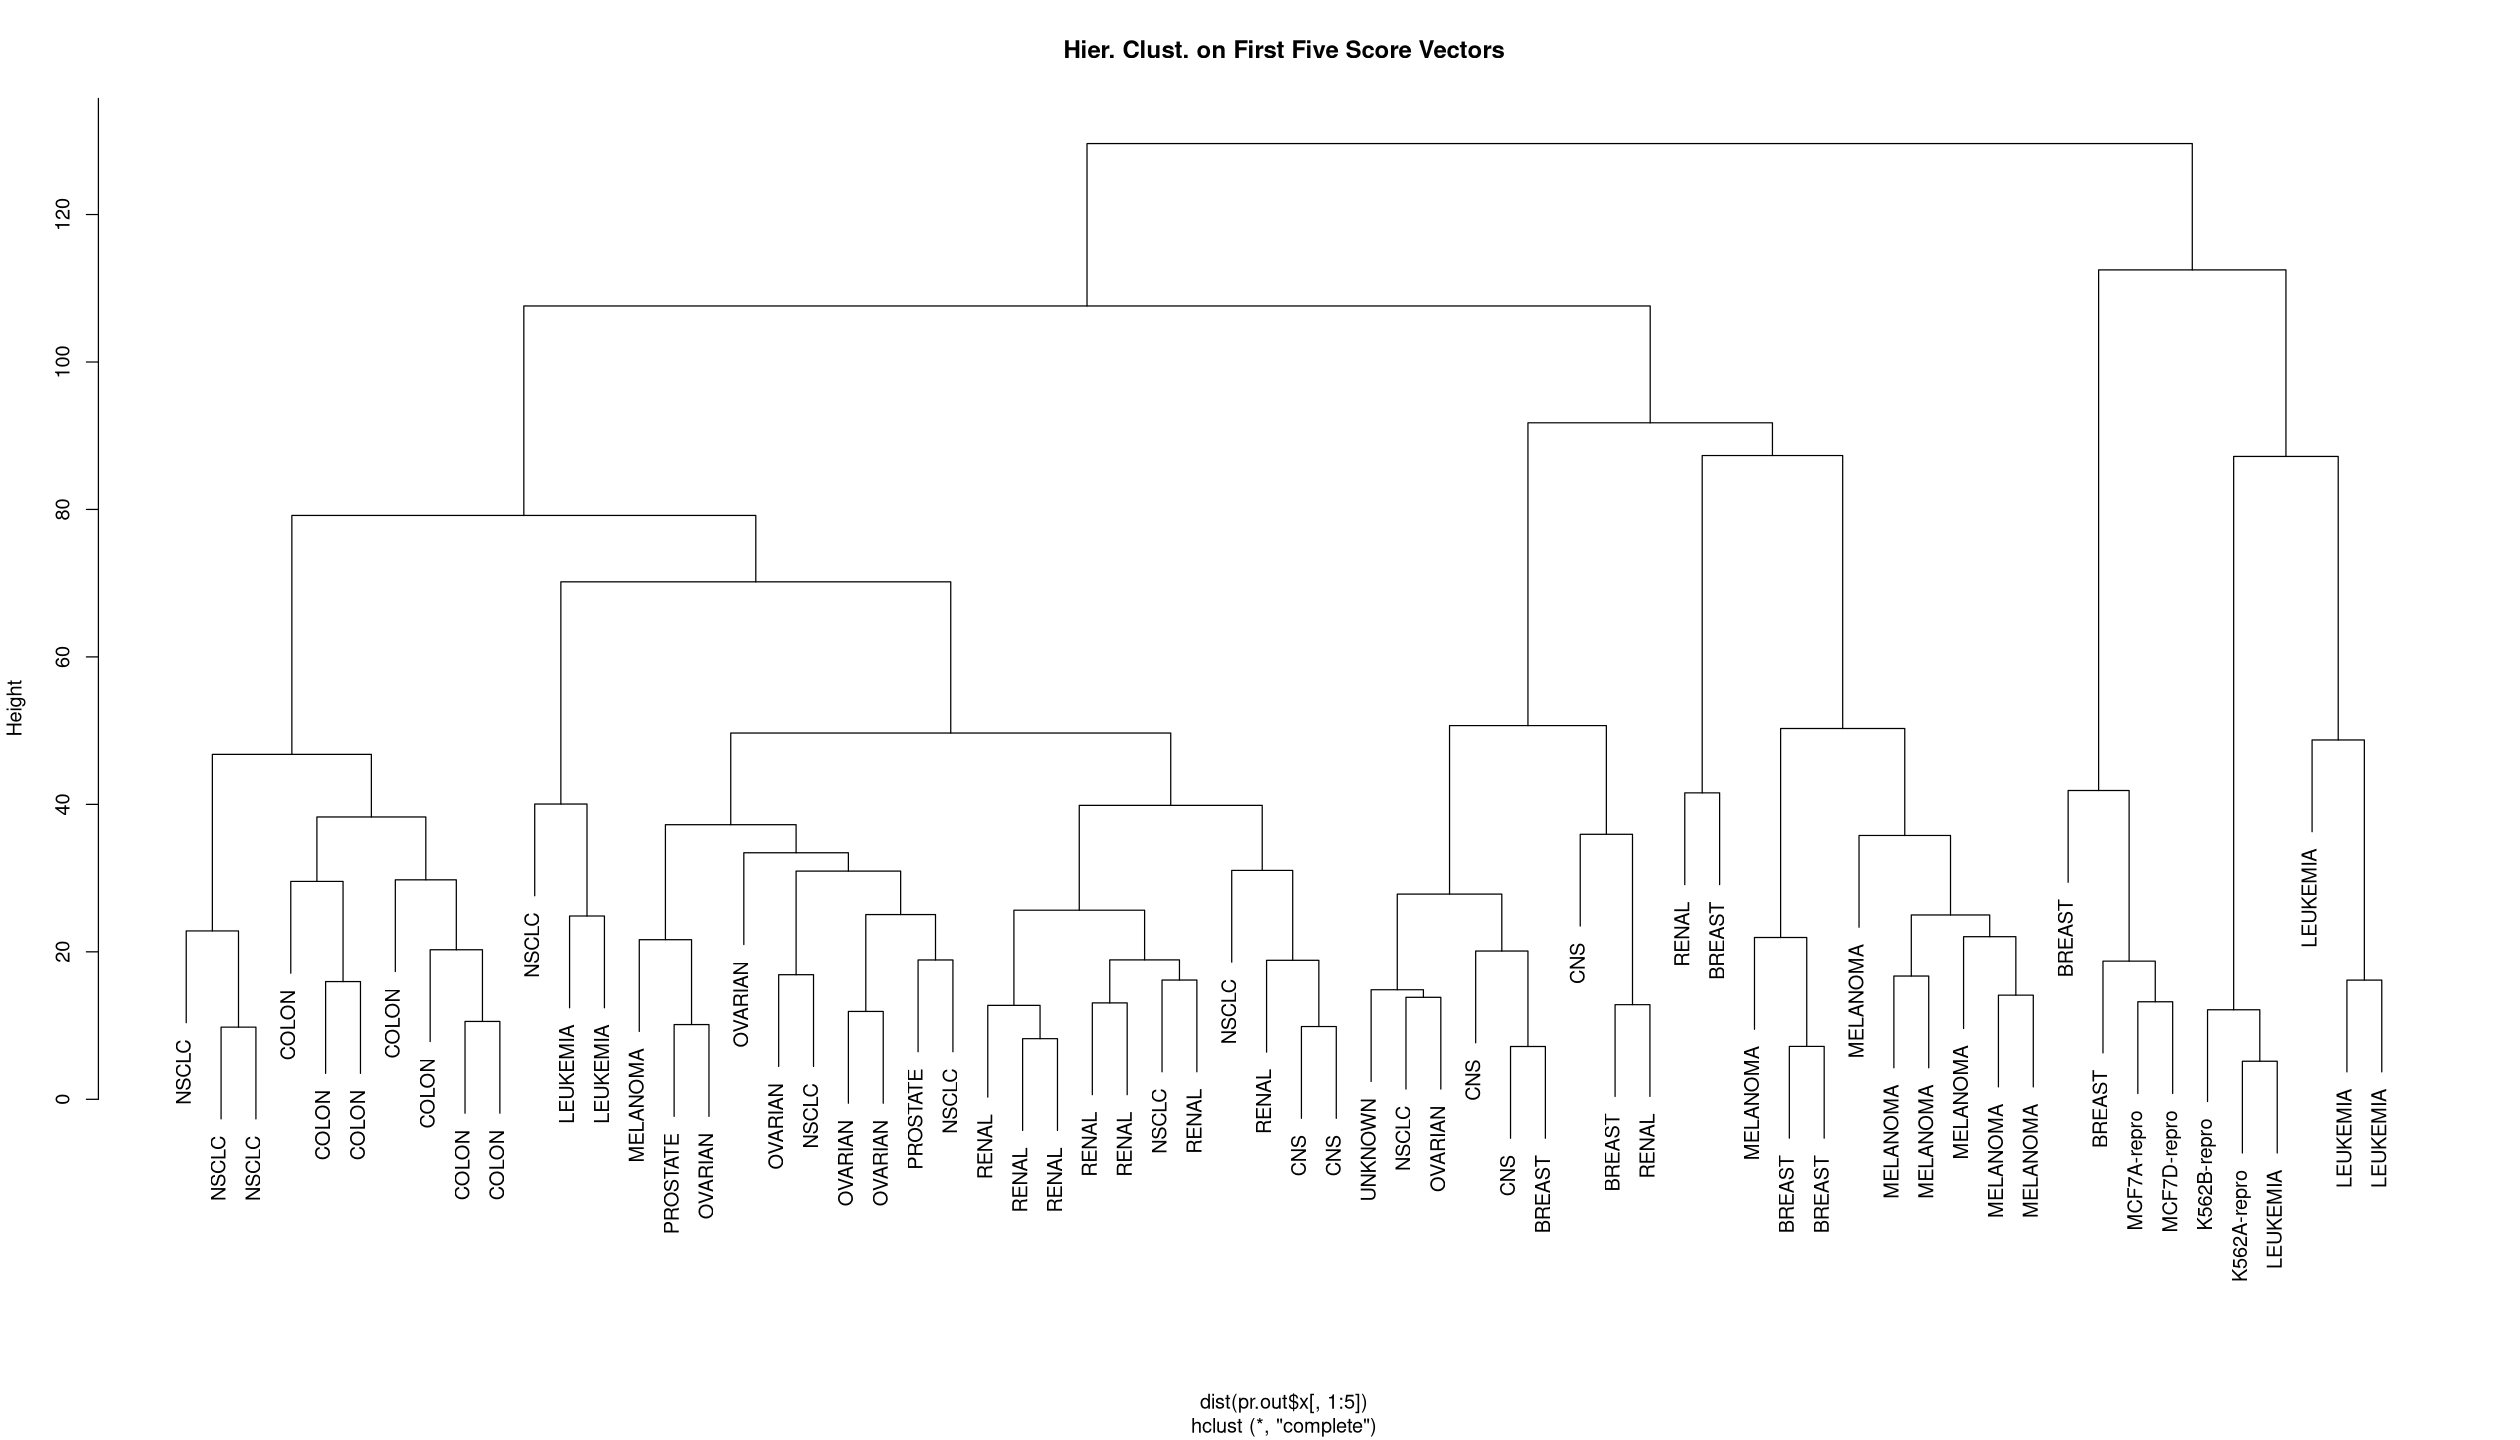

In [24]:
hc.out <- hclust(dist(pr.out$x[, 1:5]))
plot(hc.out, labels = nci.labs,
     main = "Hier. Clust. on First Five Score Vectors")
table(cutree(hc.out, 4), nci.labs)

Not surprisingly, these results are different from the ones that we obtained when we performed hierarchical clustering on the full data set. Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. In this situation, we might view the principal component step as one of denoising the data. We could also perform K-means clustering on the first few principal component score vectors rather than the full data set.